In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

In [39]:
path = Config.data_path()/'planet'
path.mkdir(parents=True, exist_ok=True)
path

WindowsPath('C:/Users/Rohit Gupta/.fastai/data/planet')

In [3]:
path=Path('C:/Users/Rohit Gupta/.fastai/data/planet')

In [4]:
path.ls()

[WindowsPath('C:/Users/Rohit Gupta/.fastai/data/planet/models'),
 WindowsPath('C:/Users/Rohit Gupta/.fastai/data/planet/test-jpg'),
 WindowsPath('C:/Users/Rohit Gupta/.fastai/data/planet/train-jpg'),
 WindowsPath('C:/Users/Rohit Gupta/.fastai/data/planet/train_v2.csv')]

In [5]:
df = pd.read_csv(path/'train_v2.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [6]:
np.random.seed(42)
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)
data = (ImageItemList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
        .random_split_by_pct(0.2) # will split our data for us (train/valid) 20% of it will go into valid
        .label_from_df(sep=' ')
        .transform(tfms, size=128,padding_mode='zeros')
        .databunch(bs=32).normalize(imagenet_stats)) 

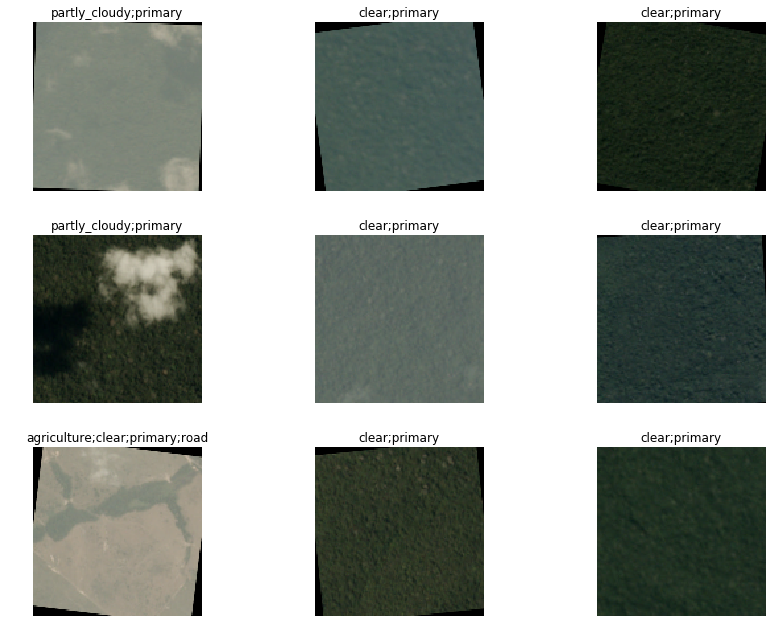

In [7]:
data.show_batch(rows=3, figsize=(12,9))

In [8]:
# Sort and Show classes
print('Classes: ',data.classes)
print('len: ',len(data.classes),data.c)

Classes:  ['agriculture', 'artisinal_mine', 'bare_ground', 'blooming', 'blow_down', 'clear', 'cloudy', 'conventional_mine', 'cultivation', 'habitation', 'haze', 'partly_cloudy', 'primary', 'road', 'selective_logging', 'slash_burn', 'water']
len:  17 17


In [9]:
arch = models.resnet34

In [10]:

acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = create_cnn(data, arch, metrics=[acc_02, f_score])

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


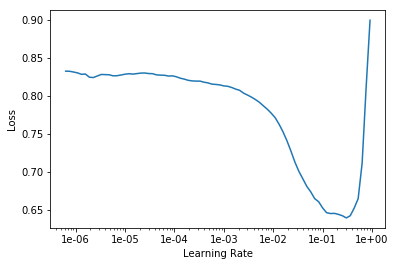

In [12]:
learn.recorder.plot()

In [13]:
lr = 0.01

In [14]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.134026,0.115949,0.935858,0.900088
2,0.124621,0.106003,0.944672,0.906192
3,0.117261,0.097311,0.947520,0.914658
4,0.104126,0.092492,0.954714,0.919919
5,0.102991,0.091664,0.953486,0.919905


In [15]:
learn.save('stage1-planet34')

In [16]:
print(data.classes)

['agriculture', 'artisinal_mine', 'bare_ground', 'blooming', 'blow_down', 'clear', 'cloudy', 'conventional_mine', 'cultivation', 'habitation', 'haze', 'partly_cloudy', 'primary', 'road', 'selective_logging', 'slash_burn', 'water']


In [17]:
interp = ClassificationInterpretation.from_learner(learn)

In [17]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


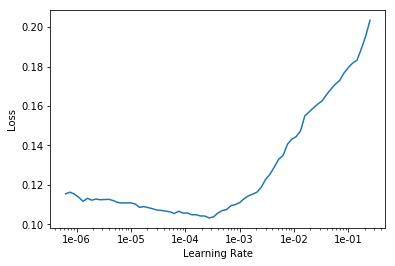

In [18]:
learn.lr_find()
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.107537,0.099301,0.950086,0.913026
2,0.108766,0.097878,0.952985,0.917029
3,0.097481,0.088834,0.954940,0.923528
4,0.094066,0.086434,0.956139,0.925045
5,0.087252,0.085395,0.956480,0.924153


In [21]:
learn.save('stage-2-planet34')

In [22]:

tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)
data1 = (ImageItemList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
        .random_split_by_pct(0.2) # will split our data for us (train/valid) 20% of it will go into valid
        .label_from_df(sep=' ')
        .transform(tfms, size=256,padding_mode='zeros')
        .databunch(bs=32).normalize(imagenet_stats)) 

In [23]:
learn.data = data1

In [25]:
data1.train_ds[0][0].shape

torch.Size([3, 256, 256])

In [26]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


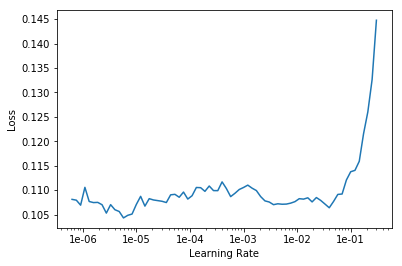

In [27]:
learn.lr_find()
learn.recorder.plot()

In [28]:
lr=1e-2/2

In [29]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.095566,0.084915,0.958370,0.922350
2,0.101183,0.085511,0.959358,0.923545
3,0.090622,0.082600,0.961204,0.927720
4,0.087139,0.079919,0.956596,0.929690
5,0.088999,0.080200,0.959380,0.928607


In [30]:
learn.save('stage-1-256-rn34')

In [31]:
learn.unfreeze()

In [32]:
learn.fit_one_cycle(3, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.090543,0.085291,0.953632,0.923687
2,0.088172,0.081627,0.959111,0.928134
3,0.086886,0.079766,0.959343,0.928873


In [33]:
learn.layer_groups

[Sequential(
   (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
   (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (2): ReLU(inplace)
   (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
   (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (6): ReLU(inplace)
   (7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (9): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (11): ReLU(inplace)
   (12): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (13): BatchNorm2d(64, eps=1e-05, momentum=0.1, affi

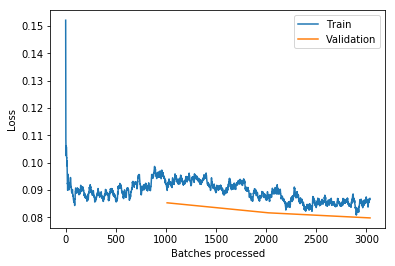

In [34]:
learn.recorder.plot_losses()

In [35]:
learn.save('stage-2-256-rn34')

In [ ]:
learn.data = (src.add_test_folder('test-jpg')
        .transform(tfms, size=256)
        .databunch().normalize(imagenet_stats))

In [36]:
filename = 'C:/Users/Rohit Gupta/.fastai/data/planet/test-jpg/test_20.jpg'

In [38]:
img = open_image(filename)
losses = learn.predict(img)
prediction = losses[0];
prediction

MultiCategory clear;primary;water

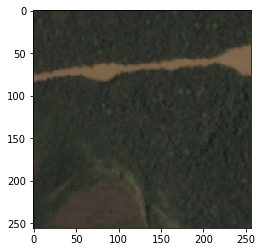

In [41]:
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
img=mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

In [42]:
df1=pd.read_csv('C:/Users/Rohit Gupta/.fastai/data/planet/sample_submission_v2.csv')

In [43]:
df1.head()

,image_name,tags
0,test_0,primary clear agriculture road water
1,test_1,primary clear agriculture road water
2,test_2,primary clear agriculture road water
3,test_3,primary clear agriculture road water
4,test_4,primary clear agriculture road water


In [46]:
imagepreds = []
fileids = []
for file in os.listdir('D:/test-jpg/'):
    filename = os.path.join('D:/test-jpg/', file)
    imgtest = open_image(filename)
    predictionarray = learn.predict(imgtest)
    file
    str(predictionarray[0])
    fileids.append(file)
    imagepreds.append(str(predictionarray[0]))
df3 = pd.DataFrame({'image_name':fileids, 'tags':imagepreds})
df3.to_csv('C:/Users/Rohit Gupta/.fastai/data/planet/output_RA.csv', index=False)
df3.head()

,image_name,tags
0,file_0.jpg,clear;primary
1,file_1.jpg,agriculture;partly_cloudy;primary
2,file_10.jpg,agriculture;haze;primary;road
3,file_100.jpg,clear;primary;water
4,file_1000.jpg,clear;primary


In [47]:
df3.shape

(61191, 2)